[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/MLBasics-Clustering/blob/main/ml-clustering.ipynb)

# Clustering
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!git clone https://www.github.com/azad-academy/MLBasics-DecisionTrees

In [1]:
from methods import *

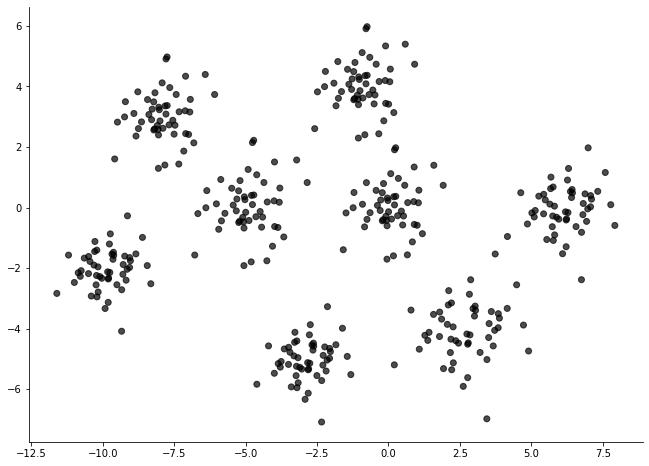

In [2]:
centers = np.array([[(0, 0) ,(2.5, -4)],[(-8, 3) ,(6, 0)],[(-5, 0) ,(-3, -5)],[(-1, 4),(-10, -2)]])
cluster_std = np.array([[0.8, 1],[0.8, 0.8],[0.9, 0.7],[0.8, 0.7]])

X = None
for i in range(len(centers)):
    x, y = make_blobs(n_samples=100, cluster_std=cluster_std[i], centers=centers[i], n_features=2, random_state=10)
    
    if(X is None):
        X = x
        Y = y
    else:
        X = np.concatenate((X,x))
        Y = np.concatenate((Y,y))


plot_data(X,Y,colmap=plt.cm.flag.reversed())
#plot_data(X)

# KMeans

## Segmenting using KMeans

In [3]:
kmeans = KMeans(X,8,std=0.8)
means,clusters = kmeans.find_means()

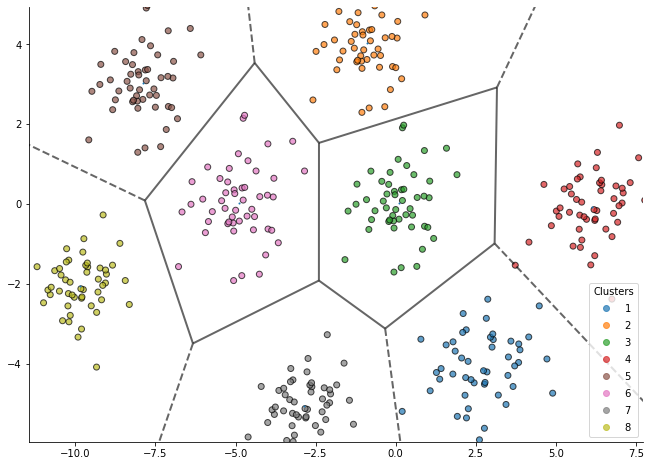

In [4]:
fig, ax = plt.subplots(figsize=(11,8))
plot_data(X, clusters,canvas=ax,show_legend=True)
kmeans.show_boundaries(ax)

## Classification using KMeans

In [4]:
kmeans = KMeans(X,8,Y,std=0.75)
means,clusters = kmeans.find_means()
Y_hat = kmeans.classify()

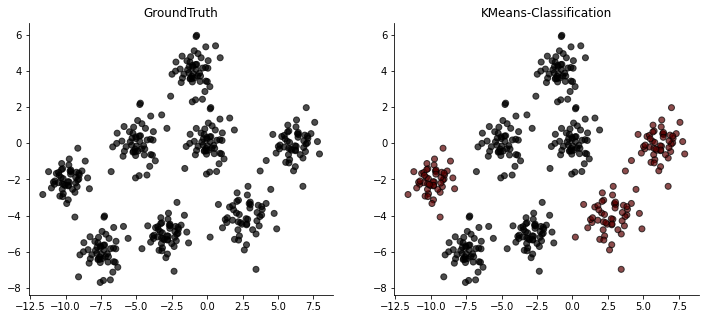

In [6]:
fig,axes = plt.subplots(1,2,figsize=(12,5))
plot_data(X, Y,colmap=plt.cm.flag.reversed(),canvas=axes[0],plt_title='GroundTruth')
plot_data(X, Y_hat+1,colmap=plt.cm.flag.reversed(),canvas=axes[1],plt_title='KMeans-Classification')

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [65]:
dbscan = DBSCAN(X,0.8,3)
cluster_indices, noise_indices = dbscan.find_clusters()

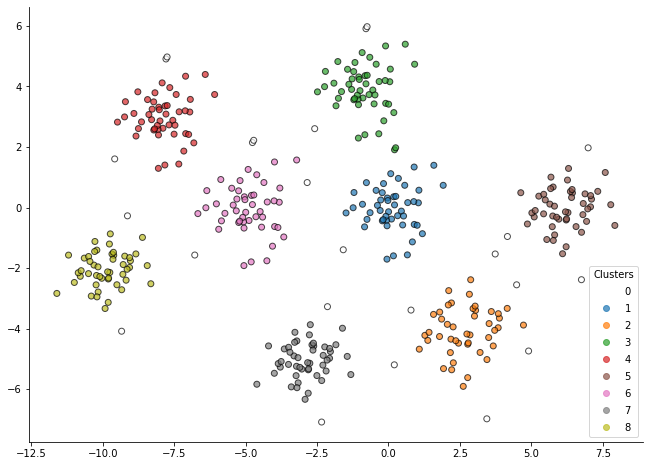

In [66]:
plot_data(X, cluster_indices,show_legend=True)

# Gaussian Mixture Models (GMM)

In [11]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=8, random_state=0).fit(X)

In [13]:
Y_hat = gm.predict(X)

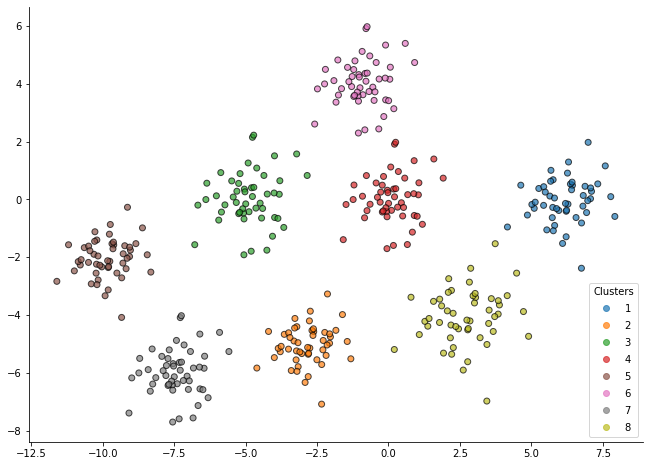

In [15]:
plot_data(X, Y_hat+1,show_legend=True)

In [15]:
kmeans = KMeans(X,8,std=0.8)
means,clusters = kmeans.find_means()
gmm = GMM(X,8,2,means)


In [16]:
gmm.train(10)

Iteration #: 1, Log-Likelihood: -1765.96
Iteration #: 2, Log-Likelihood: -1765.39
Iteration #: 3, Log-Likelihood: -1765.38
Iteration #: 4, Log-Likelihood: -1765.38
Iteration #: 5, Log-Likelihood: -1765.37
Iteration #: 6, Log-Likelihood: -1765.37
Iteration #: 7, Log-Likelihood: -1765.37
Iteration #: 8, Log-Likelihood: -1765.37
Iteration #: 9, Log-Likelihood: -1765.37
Iteration #: 10, Log-Likelihood: -1765.37


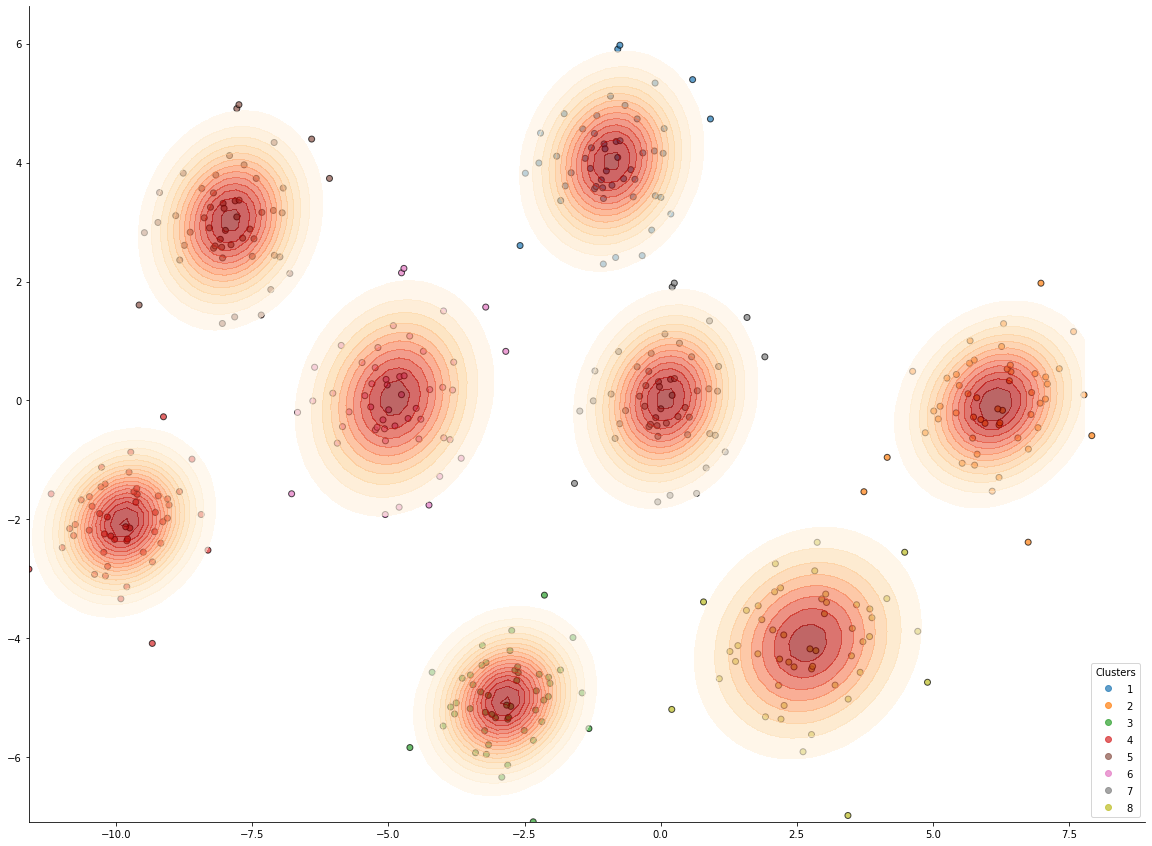

In [17]:
gmm.show_clusters(clusters)